In [31]:
# import required libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import matplotlib_inline
from matplotlib import cm
import matplotlib_inline
import seaborn as sns
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [22]:
df = pd.read_csv("merged_match_results.csv")

In [23]:
df.head()

,wk,date,time,home,homegoals,away,awaygoals,home_xg,away_xg
0,1,2021-04-10,15:00,Malmö FF,3,Hammarby,2,3.081973,0.284890
1,1,2021-04-10,17:30,Örebro,0,IFK Göteborg,0,0.630045,0.747871
2,1,2021-04-11,15:00,Halmstad,1,BK Häcken,0,1.014930,0.405163
3,1,2021-04-11,15:00,Mjällby AIF,0,Varbergs BoIS FC,0,1.517195,0.707990
4,1,2021-04-11,17:30,IF Elfsborg,0,Djurgården,2,0.841527,0.221132


In [24]:
df.shape

(240, 9)

In [37]:
df['home'].unique()

array(['Malmö FF', 'Örebro', 'Halmstad', 'Mjällby AIF', 'IF Elfsborg',
       'IFK Norrköping FK', 'AIK', 'Kalmar FF', 'Hammarby',
       'Degerfors IF', 'Östersund', 'BK Häcken', 'Djurgården',
       'IK Sirius FK', 'IFK Göteborg', 'Varbergs BoIS FC'], dtype=object)

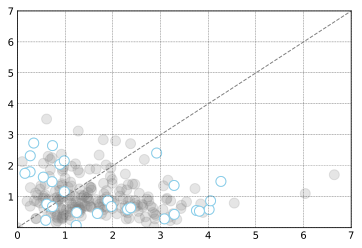

In [107]:
fig, ax = plt.subplots()
ax.grid(color='black', ls = '-.', lw = 0.25)
mdf = df[(df['home'] == 'Malmö FF') | (df['away'] == 'Malmö FF')]
#mdf.plot.scatter(x = 'home_xg', y = 'away_xg', ax = ax, )
ax.scatter(df['home_xg'], df['away_xg'], c = 'gray', alpha = 0.2, s = 100)
ax.scatter(mdf['home_xg'], mdf['away_xg'], s = 100, c = 'white', edgecolor = 'skyblue')

# set limit for x and y axis
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)

# remove tick lines from both axis
#ax.xaxis.set_tick_params(length = 0)
#ax.yaxis.set_tick_params(length = 0)
ax.tick_params(length = 0)

# remove '0' on y-axis
ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

# plot dashed line 
x = np.array([0, 7])
y = np.array([0, 7])
ax.plot(x, y, c = 'gray', ls = '--', lw = 1)

plt.show()